In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import mlxtend #apiori알고리즘 관련 라이브러리
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '쥬스'],
    ['양상추', '맥주']
])

In [3]:
te = TransactionEncoder()

In [4]:
te_ary = te.fit(data).transform(data)

In [5]:
print(te_ary)

[[ True False False  True  True]
 [ True  True  True False False]
 [ True False  True  True  True]
 [False  True  True False False]]


In [6]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,False,True,True,True
3,False,True,True,False,False


In [7]:
from mlxtend.frequent_patterns import apriori

In [8]:
result = apriori(df, min_support=0.5, use_colnames=True)
result

,support,itemsets
0,0.75,(기저귀)
1,0.50,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,(쥬스)
5,0.50,"(양상추, 기저귀)"
6,0.50,"(우유, 기저귀)"
7,0.50,"(쥬스, 기저귀)"
8,0.50,"(양상추, 맥주)"
9,0.50,"(우유, 쥬스)"


In [9]:
# 주스+우유를 함께 산 사람에게 추천을 해준다면,
# 맥주보다는 기저귀를 우선해야함
# 지지도 기반으로 판단!

In [10]:
apriori(df, min_support=0.7, use_colnames=True)

,support,itemsets
0,0.75,(기저귀)
1,0.75,(양상추)


In [11]:
# one-hot 인코딩 방식의 테이블이 필요!!
# 실제로는 물건의 개수가 아주 많음
# 0이 많은 2차원 데이터: 희소행렬(spase matrix)
# TF-IDF, Counter-Vectorizor, TransactionEncoder

In [12]:
type(result)

pandas.core.frame.DataFrame

In [13]:
# result에서 마지막 itemsets 컬럼값 추출
choice = result.iloc[10,:]
items = choice['itemsets']
items

frozenset({'기저귀', '우유', '쥬스'})

In [14]:
# 주스, 우유와 함께 추천하면 좋을 item은?
list(items)[2]

'기저귀'

# Word2Vec

In [15]:
from gensim.models import Word2Vec

In [16]:
# 자연어에서 특정한 단어(word)를 중심으로 앞 뒤의 단어를 유추(예측, 추론)할 때 사용됨

In [17]:
doc = [
    'you say goodbye and I say hello', 
    'i say happy or he said white',
    'we say unhappy and angry black'
]

In [18]:
doc2 = [
    '나는 굿바이라고 했고, 너는 헬로우라고 했어.', 
    '나는 기쁘다고 했고, 너는 하얗게 슬프다고 했어.',
    '우리는 행복하지 않고, 블랙으로 슬퍼'
]

In [19]:
# 문장을 토큰으로 끊어내자
sentences = [sentence.split(' ') for sentence in doc]
sentences

[['you', 'say', 'goodbye', 'and', 'I', 'say', 'hello'],
 ['i', 'say', 'happy', 'or', 'he', 'said', 'white'],
 ['we', 'say', 'unhappy', 'and', 'angry', 'black']]

In [20]:
# 문장을 토큰으로 끊어내자
sentences2 = [sentence.split(' ') for sentence in doc2]
sentences2

[['나는', '굿바이라고', '했고,', '너는', '헬로우라고', '했어.'],
 ['나는', '기쁘다고', '했고,', '너는', '하얗게', '슬프다고', '했어.'],
 ['우리는', '행복하지', '않고,', '블랙으로', '슬퍼']]

In [21]:
# 특정 단어의 앞뒤 단어 유추 가능
# window: 유추하는 계산을 할 때 특정 단어의 앞뒤 몇 개를 가지고 계산을 할지의 단위
# min_count: 특정한 pattern의 출현 횟수
model = Word2Vec(window=1, min_count=1)

In [22]:
# 영문 문장을 가지고 계산
model.build_vocab(sentences)

In [23]:
# 특정 단어를 주고 앞 뒤 단어를 추론
model.wv.most_similar('say')

[('or', 0.21617144346237183),
 ('hello', 0.0931011363863945),
 ('said', 0.09291724115610123),
 ('i', 0.07963486015796661),
 ('happy', 0.06285081058740616),
 ('you', 0.05433368682861328),
 ('he', 0.0270574688911438),
 ('white', 0.0161347147077322),
 ('and', -0.010839186608791351),
 ('unhappy', -0.027750365436077118)]

In [24]:
# 특정 단어를 주고 앞 뒤 단어를 추론
model.wv.most_similar('or')

[('say', 0.21617144346237183),
 ('he', 0.044689204543828964),
 ('happy', 0.015025186352431774),
 ('you', 0.010695194825530052),
 ('white', 0.001951059210114181),
 ('black', -0.03284314647316933),
 ('goodbye', -0.0455227792263031),
 ('hello', -0.045689091086387634),
 ('i', -0.0742427185177803),
 ('said', -0.09326909482479095)]

- or 단어 앞으로는 say가 나올 가능성이 제일 크고,
- or 단어 뒤로는 black 단어가 나올 가능성이 제일 큰 것을 알 수 있음

In [25]:
model2 = Word2Vec(window=2, min_count=1)

In [26]:
# 한글 문장을 가지고 계산
model2.build_vocab(sentences2)

In [27]:
# 특정 단어를 주고 앞 뒤 단어를 추론
model2.wv.most_similar('너는')

[('굿바이라고', 0.13725271821022034),
 ('나는', 0.06797593832015991),
 ('우리는', 0.03364057093858719),
 ('블랙으로', 0.009391184896230698),
 ('기쁘다고', 0.00831596553325653),
 ('슬퍼', 0.004503015894442797),
 ('헬로우라고', -0.0036444757133722305),
 ('했어.', -0.010839187540113926),
 ('했고,', -0.023671669885516167),
 ('슬프다고', -0.09575346857309341)]

- '너는' 단어 앞으로는 '굿바이라고'가 나올 가능성이 제일 크고,
- 너는' 단어 뒤로는 '했고' 단어가 나올 가능성이 제일 큰 것을 알 수 있음

# TF-IDF와 cosine 유사도

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [29]:
# 불용어 처리 가능한 tfidf 객체 생성
# tfidf는 빈도수를 구하긴 하지만, 문서마다 자주 등장하는 문서는 각 문서를 구분할 단어로
# 사용하기는 부적합하여 가중치를 낮추어 계산
tfidf = TfidfVectorizer(stop_words='english')

In [30]:
tfidf_matrix = tfidf.fit_transform(doc)
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (3, 9)


- 3 X 9에서 3: 문서의 개수, 9: 단어의 개수

In [31]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.54270061, 0.        , 0.54270061,
        0.        , 0.64105545, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54645401, 0.        ,
        0.54645401, 0.32274454, 0.        , 0.54645401],
       [0.54645401, 0.54645401, 0.        , 0.        , 0.        ,
        0.        , 0.32274454, 0.54645401, 0.        ]])

In [32]:
# 문장에 대한 코사인유사도
cosine_similarity(tfidf_matrix, tfidf_matrix)

array([[1.        , 0.20689715, 0.20689715],
       [0.20689715, 1.        , 0.10416404],
       [0.20689715, 0.10416404, 1.        ]])

- 행: 문서1, 문서2, 문서3
- 열: 문서1, 문서2, 문서3
- 문서1 <-> 문서2:  21%
- 문서1 <-> 문서3: 21%
- 문서2 <-> 문서3: 10%

In [33]:
# 1. 모든 장바구니에 대한 코사인유사도
cosine_similarity(te_ary, te_ary).round(2)

array([[1.  , 0.33, 0.87, 0.  ],
       [0.33, 1.  , 0.58, 0.82],
       [0.87, 0.58, 1.  , 0.35],
       [0.  , 0.82, 0.35, 1.  ]])

In [34]:
cos_sim = pd.DataFrame(
    cosine_similarity(te_ary, te_ary).round(2),
    columns = ['장바구니1', '장바구니2', '장바구니3', '장바구니4'],
    index = ['장바구니1', '장바구니2', '장바구니3', '장바구니4'])
cos_sim

,장바구니1,장바구니2,장바구니3,장바구니4
장바구니1,1.00,0.33,0.87,0.00
장바구니2,0.33,1.00,0.58,0.82
장바구니3,0.87,0.58,1.00,0.35
장바구니4,0.00,0.82,0.35,1.00


In [35]:
import seaborn as sns
import matplotlib.pylab as plt

In [36]:
# 1-2. 유사도를 그래프로 작성

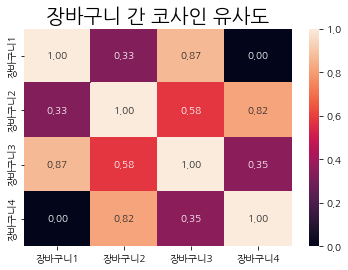

In [37]:
sns.heatmap(cos_sim, annot=True, fmt='.2f')
plt.title('장바구니 간 코사인 유사도', fontsize=20)
plt.show()

In [38]:
#첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:,1:]

#유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

#유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1)[::-1])
hotel_1_sim_value = hotel_1_sim_value[1:]

#유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)
plt.show()

NameError: name 'similarity_pair' is not defined

In [ ]:
# 2. 장바구니 1번과 제일 유사도가 높은 장바구니 : 장바구니 3(87%)

In [ ]:
# 장바구니 1번에 들어있는 item
data[0]

In [ ]:
# 장바구니 3번에 들어있는 item
data[2]

In [ ]:
# 3. 장바구니 1번에게 추천해주고 싶은 item
data[2][1]